In [2]:
import findspark
findspark.init()
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

In [3]:
import numpy as np
_x = np.array([
        ('m', 'b', 1),
        ('m', 's', 1),
        ('g', 'q', 1),
        ('h', 's', 1),
        ('g', 'q', 1),
        ('g', 'q', 0),
        ('g', 's', 0),
        ('h', 'b', 0),
        ('h', 'q', 0),
        ('m', 'b', 0)],
        dtype=[('A', 'U1'), ('B', 'U1'), ('C', 'i1')
])

In [4]:
_x['A']

array(['m', 'm', 'g', 'h', 'g', 'g', 'g', 'h', 'h', 'm'], dtype='<U1')

In [5]:
_x['B'][1:5]

array(['s', 'q', 's', 'q'], dtype='<U1')

In [6]:
_x[_x['A']=='m']

array([('m', 'b', 1), ('m', 's', 1), ('m', 'b', 0)],
      dtype=[('A', '<U1'), ('B', '<U1'), ('C', 'i1')])

In [7]:
np.count_nonzero(_x['A'][_x['C']==1] == 'm')

2

In [9]:
import collections

prior_kc=collections.defaultdict(int)
for item in _x['C']:
    prior_kc[item]+=1

In [10]:
prior_kc

defaultdict(int, {1: 5, 0: 5})

In [11]:
allFreq=sum(prior_kc.values())
prior_c=dict()
for k,v in prior_kc.items():
    prior_c[k]=float(v)/allFreq
print ("prior_c: {}".format(prior_c))

prior_c: {1: 0.5, 0: 0.5}


In [12]:
aLikelihood_c1=_x['A'][_x['C']==1]
kc_a_c1=collections.defaultdict(int)
for item in aLikelihood_c1:
    kc_a_c1[item]+=1
print ('kc_a_c1 key counts computed: {}',format(kc_a_c1))

kc_a_c1 key counts computed: {} defaultdict(<class 'int'>, {'m': 2, 'g': 2, 'h': 1})


In [13]:
allFreq=len(aLikelihood_c1)
prob_a_c1=dict()
for k,v in kc_a_c1.items():
    prob_a_c1[k]=float(v)/allFreq
print ("prob_a_c1: {}".format(prob_a_c1))

prob_a_c1: {'m': 0.4, 'g': 0.4, 'h': 0.2}


In [14]:
bLikelihood_c1=_x['B'][_x['C']==1]
kc_b_c1=collections.defaultdict(int)
for item in bLikelihood_c1:
    kc_b_c1[item]+=1
print ('kc_b_c1 key counts computed: {}',format(kc_b_c1))

kc_b_c1 key counts computed: {} defaultdict(<class 'int'>, {'b': 1, 's': 2, 'q': 2})


In [15]:
allFreq=len(bLikelihood_c1)
prob_b_c1=dict()
for k,v in kc_b_c1.items():
    prob_b_c1[k]=float(v)/allFreq
print ("prob_b_c1: {}".format(prob_b_c1))

prob_b_c1: {'b': 0.2, 's': 0.4, 'q': 0.4}


In [16]:
print ("prior_c: {}".format(prior_c))

prior_c: {1: 0.5, 0: 0.5}


In [17]:
print ("prob_a_c1: {}".format(prob_a_c1))

prob_a_c1: {'m': 0.4, 'g': 0.4, 'h': 0.2}


In [18]:
print ("prob_b_c1: {}".format(prob_b_c1))

prob_b_c1: {'b': 0.2, 's': 0.4, 'q': 0.4}


In [19]:
post_c1=prior_c[1]*prob_a_c1['m']*prob_b_c1['q']
print ("posterior computed if c==1: {:.3f}".format(post_c1))

posterior computed if c==1: 0.080


In [22]:
prior_c0 = np.count_nonzero(_x['C']==0)/_x.shape[0]

In [23]:
prob_am_c0=np.count_nonzero(_x['A'][_x['C']==0] == 'm')/np.count_nonzero(_x['C']==0)

In [24]:
prob_bq_c0=np.count_nonzero(_x['B'][_x['C']==0] == 'q')/np.count_nonzero(_x['C']==0)

In [25]:
post_c0 = prior_c0 * prob_am_c0 * prob_bq_c0
f"post_cf:{post_c0:.3f}"

'post_cf:0.040'

In [26]:
np.array([post_c1,post_c0]).argmax()

0

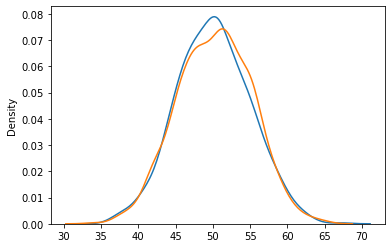

In [27]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(random.normal(loc=50, scale=5, size=1000), label='normal')
sns.kdeplot(random.binomial(100, p=0.5, size=1000), label='binomial')
plt.show()

In [30]:
import numpy as np

np.random.beta(1,1,100).mean()

0.5416111687787318

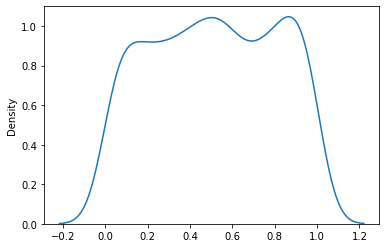

In [31]:
sns.kdeplot(random.beta(a=1, b=1, size=1000), label='binomial')
plt.show()

In [32]:
from scipy import special
n=6
k=0
p=0.5
# comb(6,0)는 exact연산.
print (special.comb(6, k, exact=True)*(p**k)*( (1-p)**(n-k) ) )

0.015625


In [33]:
for i in range(7):
    print ("Pr(X = {} heads)= {:.5f}".format(i, special.comb(6, i, exact=True)*(p**i)*( (1-p)**(n-i) ) ) )

Pr(X = 0 heads)= 0.01562
Pr(X = 1 heads)= 0.09375
Pr(X = 2 heads)= 0.23438
Pr(X = 3 heads)= 0.31250
Pr(X = 4 heads)= 0.23438
Pr(X = 5 heads)= 0.09375
Pr(X = 6 heads)= 0.01562


In [34]:
import scipy.stats as stats
for i in range(7):
    print ("{:.5f}".format(stats.binom.pmf(i,6,0.5)))

0.01563
0.09375
0.23438
0.31250
0.23438
0.09375
0.01563
